
# 项目：分析TMDB电影风格相关的数据

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 根据TMDB电影数据（https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv），
> 分析电影风格变化的趋势，以及电影风格与电影收益之间的关系。

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。

# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 解决中文和负号显示错误
# 用来正常显示中文标签，SimHei是字体名称，字体必须再系统中存在，字体的查看方式和安装第三部分
plt.rcParams['font.sans-serif']=['SimHei']  

 # 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False 

<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [3]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('tmdb-movies.csv', dtype={'genres':str})
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### 字段说明
id: 电影id<br>
imdb_id: imdb id<br>
popularity: 流行度<br>
budget：预算<br>
revenue：收入<br>
original_title：片名<br>
cast: 演职员表<br>
homepage: 电影主页<br>
directior： 导演<br>
tagline: 宣传语<br>
keywords：关键词<br>
overview: 影片概述<br>
runtime：影片时长<br>
genres：影片风格<br>
production_companies：出品公司<br>
release_date：发行日期<br>
vote_count：得票总数<br>
vote_average：平均分<br>
release_year：发行年<br>
budget_adj：调整后预算<br>
revenue_adj：调整后收入<br>



### 数据清理，针对分析的目标，检查数据并清除无效数据

In [6]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。
df.isnull().any()


id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [7]:
# 发现风格genres列有为空的数据行，需要先删除
df = df.dropna(subset=['genres'])

In [8]:
# 转换release_date数据类型为日期，并且格式为“年-月-日”
df['release_date'] = pd.to_datetime(df['release_date'], 
    format='%Y-%m-%d', errors='coerce')

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。



### 研究问题1：电影风格的总数统计

In [9]:
# 挑选所有电影风格
genres_set = set()
for g in df['genres']:
    genres_set.update(g.split('|'))
#genres_set

In [10]:
# 统计所有年份中，电影风格的总数，并按倒序显示
genres_df = pd.DataFrame()
for g in genres_set:
    genres_df[g] = df['genres'].str.contains(g).map(lambda x: 1 if x else 0)
genres_df['year'] = df['release_year']
genres_df_year_sum = genres_df.groupby('year').sum().sum().sort_values(ascending=False)
#genres_df_year_sum

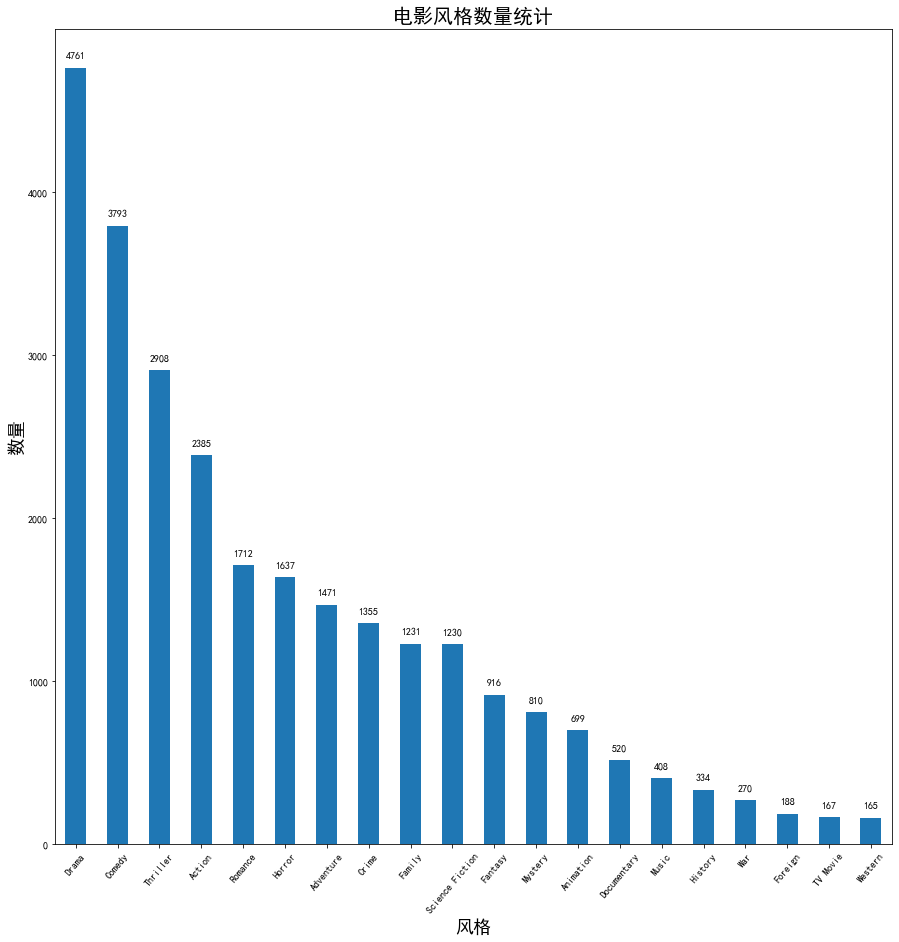

In [11]:
# 绘图
fig = plt.figure(figsize=(15,15))  
#axl = plt.subplot(1,1,1)     
ax = genres_df_year_sum.plot.bar()
plt.xticks(rotation=50)
plt.title('电影风格数量统计', fontsize=20)    
plt.xlabel('风格', fontsize=18)    
plt.ylabel('数量', fontsize=18)    
for x, y in enumerate(genres_df_year_sum):
    plt.text(x, y + 100, '%s' % y, ha='center', va='top')

# 保存图片
fig.savefig('film_genre_count.png',dpi=600)

### 研究问题2：电影风格随时间的变化趋势

In [12]:
# 自1960年开始, 按年统计
genre_by_year = genres_df.groupby('year').sum().loc[1960:,:]

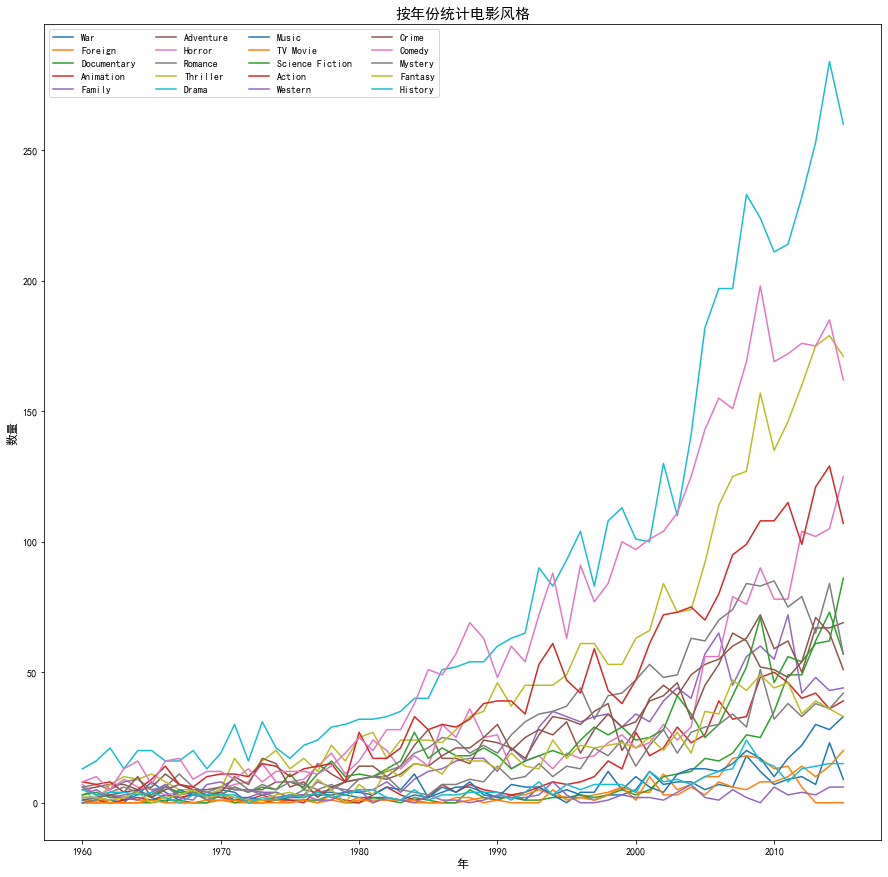

In [13]:
# 绘图

fig = plt.figure(figsize=(15,15))
ax = plt.subplot(1,1,1)
plt.plot(genre_by_year)
plt.xlabel('年', fontsize=12)
plt.ylabel('数量', fontsize=12)
plt.title('按年份统计电影风格', fontsize=15)

year_min = df['release_year'].min()   #最小年份
year_max = df['release_year'].max()   #最大年份
plt.xticks(range(year_min, year_max, 10))  #横坐标每隔10年一个刻度
plt.legend(genres_set, loc='best',ncol=4)

# 保存图片
fig.savefig('film_count_by_year.png',dpi=600)


### 研究问题3： 电影风格的收入

In [14]:
#计算不同风格电影收入(亿元)
revenue_df = pd.DataFrame()#创建空的数据框

revenue_df = pd.concat([genres_df.iloc[:,:-1],df['revenue']],axis=1)  #合并

#revenue_df.head()

In [15]:
# 不同风格电影的收入
r={}
for genre in genres_set:
    r[genre]=df.loc[revenue_df[genre]==1,'revenue'].sum(axis=0)/100000000 # 亿元
revenue=pd.Series(r).sort_values(ascending=True)
#revenue

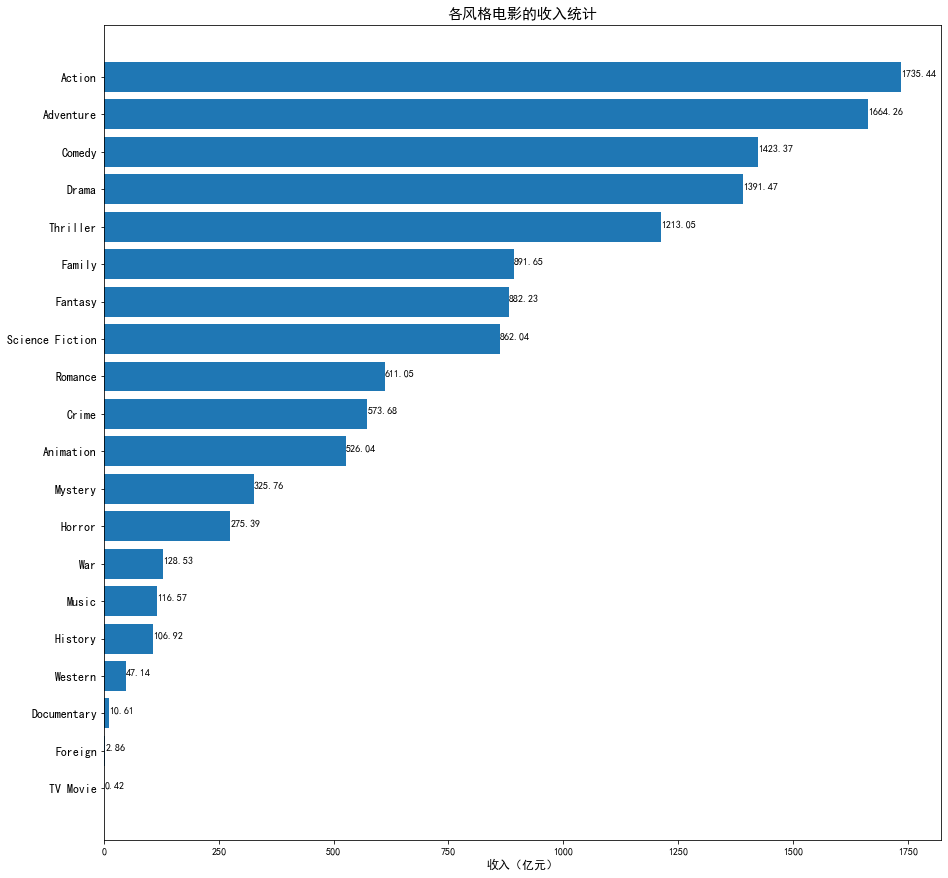

In [16]:
# 绘制横向条形图
plt.figure(figsize=(15,15))
ax=plt.subplot(1,1,1)
label=revenue.index
data=revenue.values
ax.barh(range(len(label)),data)
ax.set_yticklabels(label, fontsize=12)# y轴显示风格，作为刻度名称
ax.set_yticks(range(len(label)))# y轴刻度
plt.xlabel('收入（亿元）', fontsize=12)
ax.set_title('各风格电影的收入统计', fontsize=15)

for x,y in zip(data,range(len(label))):
    ax.text(x,y,'{:.2f}'.format(x))#坐标位置，及要显示的文字内容
    
# 保存图片
fig.savefig('film_genres_revenue.png',dpi=600)

### 研究问题4： 电影风格与收益的关系

In [17]:
# 计算收益（收入-投资）
df['profit'] = df['revenue']-df['budget']

profit_df = pd.DataFrame()

profit_df = pd.concat([genres_df.iloc[:,:-1],df['profit']],axis=1)  #合并

#profit_df.head(2)

In [18]:
# 按风格统计收益
profit_by_genre = pd.Series(index=genres_set)
for genre in genres_set:
    profit_by_genre[genre]=df.loc[profit_df[genre]==1,'profit'].sum(axis=0)/100000000 # 亿


In [19]:
# 按风格统计投资
budget_df = pd.concat([genres_df.iloc[:,:-1],df['budget']],axis=1)
budget_by_genre = pd.Series(index=genres_set)
for genre in genres_set:   
     budget_by_genre[genre]=df.loc[budget_df[genre]==1,'budget'].sum(axis=0)/100000000 # 亿


In [20]:
# 合并
profit_budget_df = pd.concat([profit_by_genre, budget_by_genre],axis=1)
profit_budget_df.columns=['profit','budget'] 

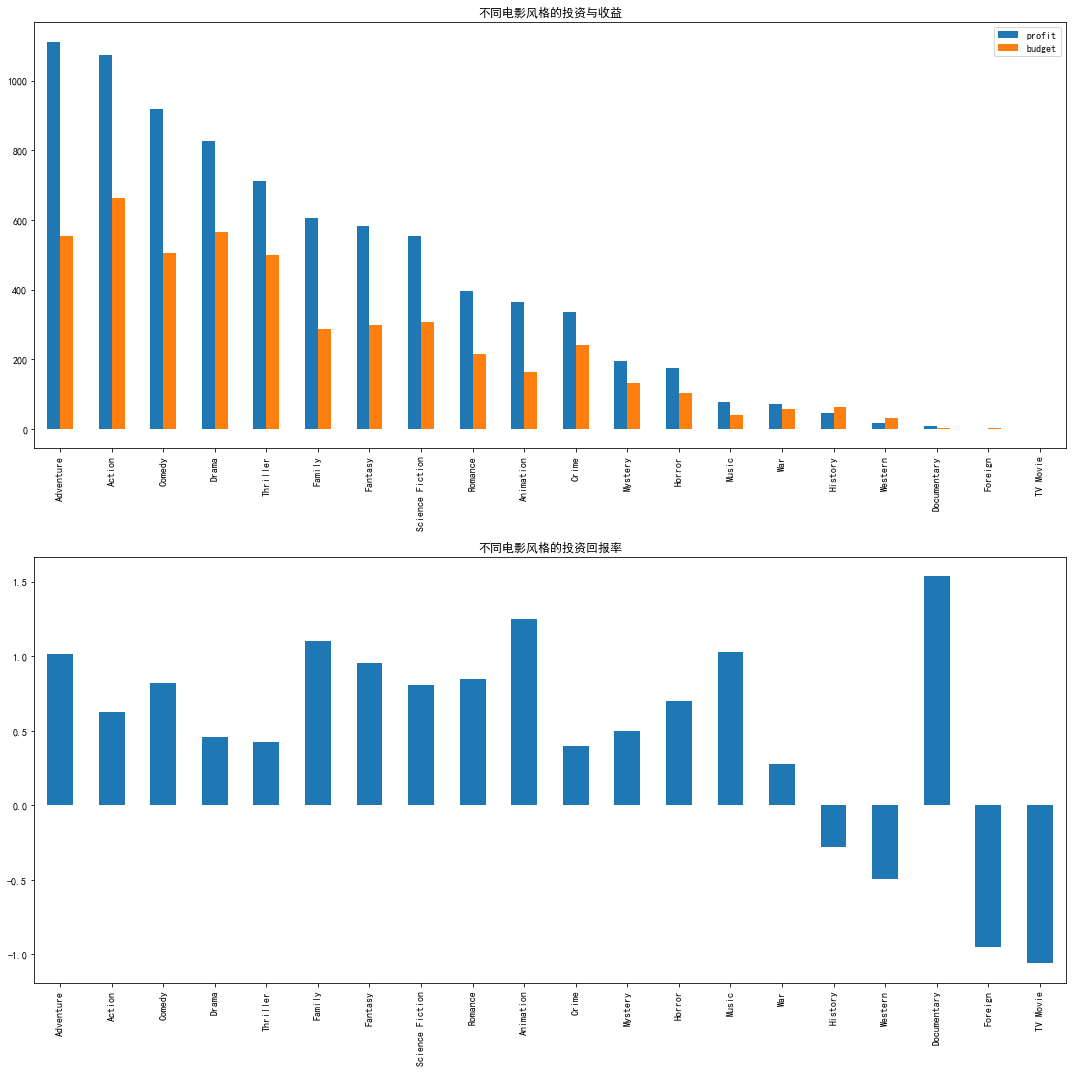

In [21]:
# 绘图，显示投资与收益的对比，以及投资回报率
fig, axes = plt.subplots(2,1, figsize=(15,15))
profit_budget_df['ROI'] = (profit_budget_df.profit - profit_budget_df.budget) / profit_budget_df.budget

profit_budget_df.sort_values('profit', ascending=False)[['profit', 'budget']].plot(ax=axes[0], kind='bar', title='不同电影风格的投资与收益')
profit_budget_df.sort_values('profit', ascending=False)['ROI'].plot(ax=axes[1], kind='bar', title='不同电影风格的投资回报率')
fig.tight_layout()


<a id='conclusions'></a>
## 结论

1. 自1960年来，从电影数量上看，整体呈上涨趋势
2. 热门风格的电影始终保持比较高的占有量
3. 但是，近两年，以往最热门的剧情、喜剧、动作类电影略有下降的趋势
4. 从票房收入的角度看，热门风格的电影也占据了排名的前列
5. 热门风格的电影，在投资回报率上的表现也不错。不过，值得注意的是，票房收入排名5到10位的电影风格，投资回报率超过了前5位。




In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-zh.ipynb'])

0